In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_file = "data/mouse_drug_data.csv"
clinical_trial_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_file)
clinical_trial_data = pd.read_csv(clinical_trial_file)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(['Drug', 'Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)': 'mean'})

# Convert to DataFrame
mean_tumor_volume_by_drug_df = pd.DataFrame(mean_tumor_volume)

# Preview DataFrame
print(mean_tumor_volume_by_drug_df.head(12))

         Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
5   Capomulin         25           39.939528
6   Capomulin         30           38.769339
7   Capomulin         35           37.816839
8   Capomulin         40           36.958001
9   Capomulin         45           36.236114
10   Ceftamin          0           45.000000
11   Ceftamin          5           46.503051


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = combined_data.groupby(['Drug','Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)': 'sem'})

# Convert to DataFrame
sem_tumor_volume_by_drug_df = pd.DataFrame(sem_tumor_volume)

# Preview DataFrame
print(sem_tumor_volume_by_drug_df.head(5))

        Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
# Select the columns needed
formatted_data = combined_data.loc[:,('Timepoint', 'Drug', 'Tumor Volume (mm3)')]

# Pivot the data keeping Timepoint as index
formatted_pivot = pd.pivot_table(formatted_data, index='Timepoint', columns='Drug')

# The Pivoting adds an additional level of header with 'Tumor Volume (mm3)' drop it to match the required result
formatted_pivot = formatted_pivot.xs('Tumor Volume (mm3)', axis=1, drop_level=True)

# Take a look at the reformatted data
formatted_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
# Create a formatter list
formatter_list = [('Capomulin', 'o', 'red'), ('Infubinol', '^', 'blue'),
                 ('Ketapril', 's', 'green'), ('Placebo', 'd', 'black')]

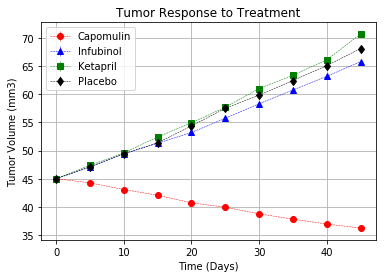

In [8]:
# Generate the Plot (with Error Bars)
plot_data = formatted_pivot.loc[:,('Capomulin','Infubinol', 'Ketapril', 'Placebo')]
meta_stat_stderrors = formatted_data.sem()
for drug, marker, color in formatter_list:
    stderror_per_drug = meta_stat_stderrors[0]
    meta_static_site_plot = plt.errorbar(plot_data.index, 
                                     plot_data[drug],
                                     stderror_per_drug,
                                     marker=marker,
                                     ls='--',
                                     color=color,
                                     linewidth=0.5)
# Save the figure
plt.savefig("../Images/tumor_response_plot.png")

plt.legend(labels=list(plot_data), loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_stat_means = combined_data.groupby(['Drug','Timepoint']).aggregate({'Metastatic Sites': 'mean'})

# Convert to DataFrame
meta_stat_means_df = pd.DataFrame(meta_stat_means)

# Preview DataFrame
meta_stat_means_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_stat_sems = combined_data.groupby(['Drug','Timepoint']).aggregate({'Metastatic Sites': 'sem'})

# Convert to DataFrame
meta_stat_sems_df = pd.DataFrame(meta_stat_sems)

# Preview DataFrame
meta_stat_sems_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Select the columns needed
formatted_meta_stat_data = combined_data.loc[:,('Timepoint', 'Drug', 'Metastatic Sites')]

# Pivot the data keeping Timepoint as index
formatted_meta_stat_pivot = pd.pivot_table(formatted_meta_stat_data, index='Timepoint', columns='Drug')

# The Pivoting adds an additional level of header with 'Metastatic Sites' drop it to match the required result
formatted_meta_stat_pivot = formatted_meta_stat_pivot.xs('Metastatic Sites', axis=1, drop_level=True)

# Preview that Reformatting worked
formatted_meta_stat_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


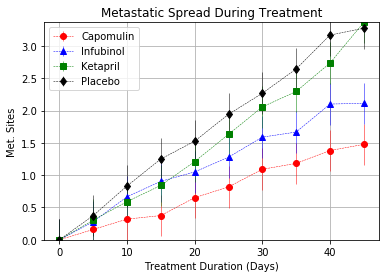

In [12]:
# Generate the Plot (with Error Bars)
plot_data = formatted_meta_stat_pivot.loc[:,('Capomulin','Infubinol', 'Ketapril', 'Placebo')]
meta_stat_stderrors = formatted_meta_stat_data.sem()
for drug, marker, color in formatter_list:
    stderror_per_drug = meta_stat_stderrors[0]
    meta_static_site_plot = plt.errorbar(plot_data.index, 
                                     plot_data[drug],
                                     stderror_per_drug,
                                     marker=marker,
                                     ls='--',
                                     color=color,
                                     linewidth=0.5)
# Save the figure
plt.savefig("../Images/meta_static_response_plot.png")
# Show the Figure
plt.legend(labels=list(plot_data), loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.ylim(0.0, plot_data.values.max())
plt.grid()
plt.show()

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_counts_per_drugtp = combined_data.groupby(['Drug', 'Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)': 'size'})

# Convert to DataFrame
mouse_counts_per_drugtp_df = pd.DataFrame(mouse_counts_per_drugtp)
mouse_counts_per_drugtp_df = mouse_counts_per_drugtp_df.rename(columns={'Tumor Volume (mm3)': 'Mouse Count'})

# Preview DataFrame
mouse_counts_per_drugtp_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_counts_per_drugtp = combined_data.groupby(['Drug', 'Timepoint'], as_index=False).aggregate({'Tumor Volume (mm3)': 'size'})

# Pivot the data keeping Timepoint as index
formatted_mcpdtp_pivot = pd.pivot_table(mouse_counts_per_drugtp, index='Timepoint', columns='Drug')

# The Pivoting adds an additional level of header with 'Tumor Volume (mm3)' drop it to match the required result
formatted_mcpdtp_pivot = formatted_mcpdtp_pivot.xs('Tumor Volume (mm3)', axis=1, drop_level=True)

# Preview that Reformatting worked
formatted_mcpdtp_pivot.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


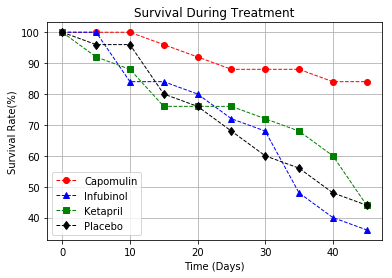

In [15]:
# Generate the Plot (Accounting for percentages)
plot_data = formatted_mcpdtp_pivot.loc[:,('Capomulin','Infubinol', 'Ketapril', 'Placebo')]
for drug, marker, color in formatter_list:
    mouse_per_drug = plot_data[drug][0]
    pct_survived = (plot_data[drug]/mouse_per_drug)*100
    pct_plot = plt.plot(plot_data.index,pct_survived, marker=marker, ls='--', color=color, linewidth=1)
# Save the figure
plt.savefig("../Images/survival_pct_plot.png")
# Show the Figure
plt.legend(labels=list(plot_data), loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate(%)")
plt.grid()
plt.show()

## Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug
pct_change = ((formatted_pivot.iloc[-1] - formatted_pivot.iloc[0])  / formatted_pivot.iloc[0]) * 100
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

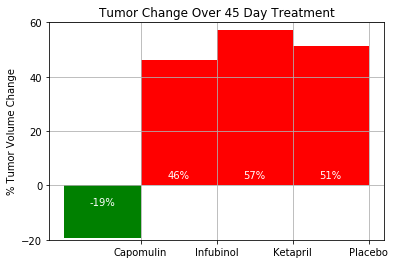

In [83]:
# Create a list of drugs of interest for this problem
relevant_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
# Store all Relevant Percent Changes into a Tuple
relavant_changes = [pct_change[drug] for drug in relevant_drugs]

# Splice the data between passing and failing drugs
# While measuring the Tumor Volume, if the percent change is negative, 
# it means that the drug is passing.
passing_drugs = pct_change < 0

# Orient widths. Add labels, tick marks, etc. 
# use plt.bar for bar plots
# x = drug names from relevant_drugs list above
# y = respective percent changes from relevant_changes list above
# width = -1 helps to indent / push the plot inside from y-axis
# 'edge': Align the left edges of the bars with the x positions(matplotlib docs)
# colors have been matched to passing_drugs series above using formatting
# techniques.

pct_change_plot = plt.bar(relevant_drugs, relavant_changes, width=-1,
                         align='edge', color = passing_drugs.map({True:'green', False:'red'}))
plt.ylim(-20,60)
plt.yticks((-20,0,20,40,60))
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
# Use functions to label the percentages of changes
def label_bars(relavant_changes):
    for change in relavant_changes:
        height = change.get_height()
        #print(height)
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        # plt.text example call from matplotlib is: text(x, y, s, fontsize=12)
        # where s is labelstring formatted to our requirement
        # other arguments are from the **kwargs drawn from other plotting properties.
        plt.text((change.get_x() + change.get_width() / 2.), 
                 label_position,
                '%d' % int(height) + '%', 
                 color = 'white', 
                 horizontalalignment = 'center', 
                 verticalalignment ='bottom')

# Call functions to implement the function calls
label_bars(pct_change_plot)

# Save the Figure
plt.savefig("../Images/TumorChange_plot.png")

# Show the Figure
plt.show()

# Report on Pymaceuticals Analysis

It is observed that the drug Capomulin seem to have shown positive results. The following observations from the analysis further supports with evidences from the data analyzed.

1. Mice which were given this drug have shown reduction in their tumor volume compared to the other drugs over the 45 days trial period.

2. From the Metastatic Spread Treatment plot above, it is evident that this drug also had better control over the spread of Metastatic Sites.

3. The table listing the mice counts at observed timepoints also supports the observation above.

3. The Survival plot above, shows that over 80 percent of the mice have survived were on Capomulin.

Conclusion: From the summary bar plot, we can say that Capomulin has in fact has shown a negative change in the tumor volume when the other drugs have shown positive change, confirming that it is a better drug compared to the rest.